# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [2]:
dataset = get_dataset("/home/workspace/data/*/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/*/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/*/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 99
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
from enum import Enum
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib.patches import Rectangle
from PIL import Image

matplotlib.use("NbAgg")

class Label(Enum): # from label_map.pbtxt
    VEHICLE = 1
    PEDESTRIAN = 2
    CYCLIST = 4
    
COLORMAP = {Label.VEHICLE: [1, 0, 0], Label.PEDESTRIAN: [0, 1, 0], Label.CYCLIST: [0, 0, 1]}
    
def display_images(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE
    f, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(batch['image'])
    width, height, _ = batch['image'].shape
    
    for box, label in zip(batch['groundtruth_boxes'], batch['groundtruth_classes']):
        # tf boxes are ymin, xmin, ymax, xmax
        y1, x1, y2, x2 = box.numpy() * width
        rec = Rectangle( 
            (x1, y1), abs(x2-x1), abs(y2-y1), 
            facecolor='none', edgecolor=COLORMAP[Label(label.numpy())])
        ax.add_patch(rec)
    
    plt.tight_layout()
    plt.show()



## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

<IPython.core.display.Javascript object>


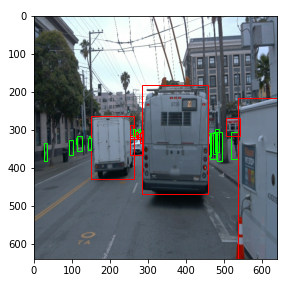

<IPython.core.display.Javascript object>


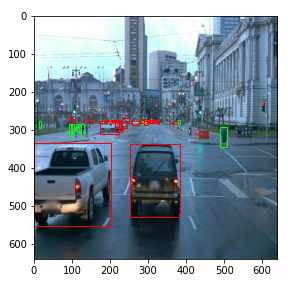

<IPython.core.display.Javascript object>


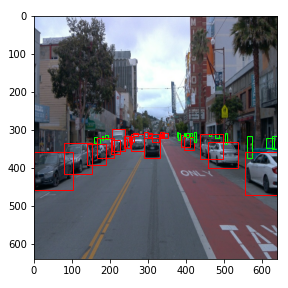

<IPython.core.display.Javascript object>


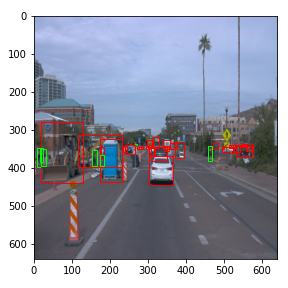

<IPython.core.display.Javascript object>


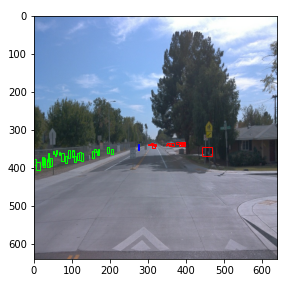

<IPython.core.display.Javascript object>


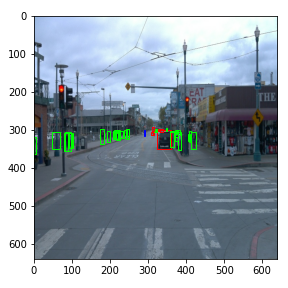

<IPython.core.display.Javascript object>


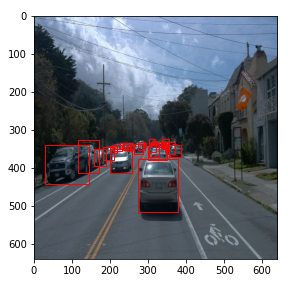

<IPython.core.display.Javascript object>


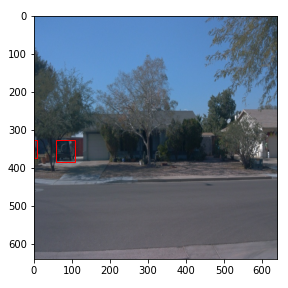

<IPython.core.display.Javascript object>


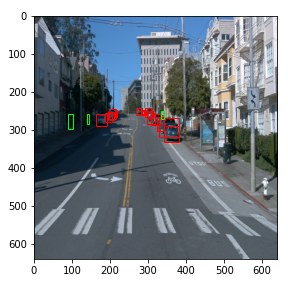

<IPython.core.display.Javascript object>


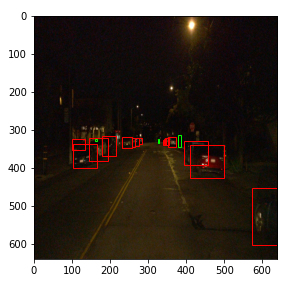

In [4]:
# Display 10 random images in dataset
for batch in dataset.shuffle(100).take(10):
    display_images(batch)
    

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

# Look at some more images with their color histograms

In [5]:
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

def channel_histogram(rgb_picture, ax=None):
    """Calculate channel wise pixel value and plot with seaborn kde.
    
    Expects list of list of rgb triplets and an axes to plot on.
    """
    R, G, B = zip(*[rgb for rows in rgb_picture  for rgb in rows ])
    L = [(r+g+b)/3 for r,g,b in zip(R,G,B)]
    sns.kdeplot(R, color='r', ax=ax)
    sns.kdeplot(G, color='g', ax=ax)
    sns.kdeplot(B, color='b', ax=ax)
    p = sns.kdeplot(L, color='black', ax=ax)
    p.set(xticklabels=[], yticklabels=[], xlabel=None, ylabel=None)
    
def display_with_boxes(batch, ax=None):
    """Display an image with boxes.
    
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes. Similar to above, but now refactored to
    also take an axes argument.
    """
    ax.imshow(batch['image'])
    width, height, _ = batch['image'].shape
    
    for box, label in zip(batch['groundtruth_boxes'], batch['groundtruth_classes']):
        y1, x1, y2, x2 = box.numpy() * width
        rec = Rectangle( 
            (x1, y1), abs(x2-x1), abs(y2-y1), 
            facecolor='none', edgecolor=COLORMAP[Label(label.numpy())])
        ax.add_patch(rec)

    
def display_for_multiple(batches, dim=3):
    """Plots multiple of image/histogram combinations into one plot.
    
    Expects a batch with at least dim*dim elements.
    """
    fig = plt.figure(figsize=(14, 14))
    outer = GridSpec(dim, dim, wspace=0.01, hspace=0.01)
    
    bs = []
    for b in batches:
        bs.append(b)
        if len(bs) >= dim*dim:
            break

    for i in range(dim*dim):
        inner = GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.0, hspace=0.0, height_ratios=[2, 1])

        ax1 = plt.Subplot(fig, inner[0])
        display_with_boxes(bs[i], ax=ax1)
        ax1.set_xticks([])
        ax1.set_yticks([])
        fig.add_subplot(ax1)
        
        ax2 = plt.Subplot(fig, inner[1])
        channel_histogram(bs[i]['image'].numpy(), ax=ax2)
        fig.add_subplot(ax2)

    fig.show()
    

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86


<IPython.core.display.Javascript object>


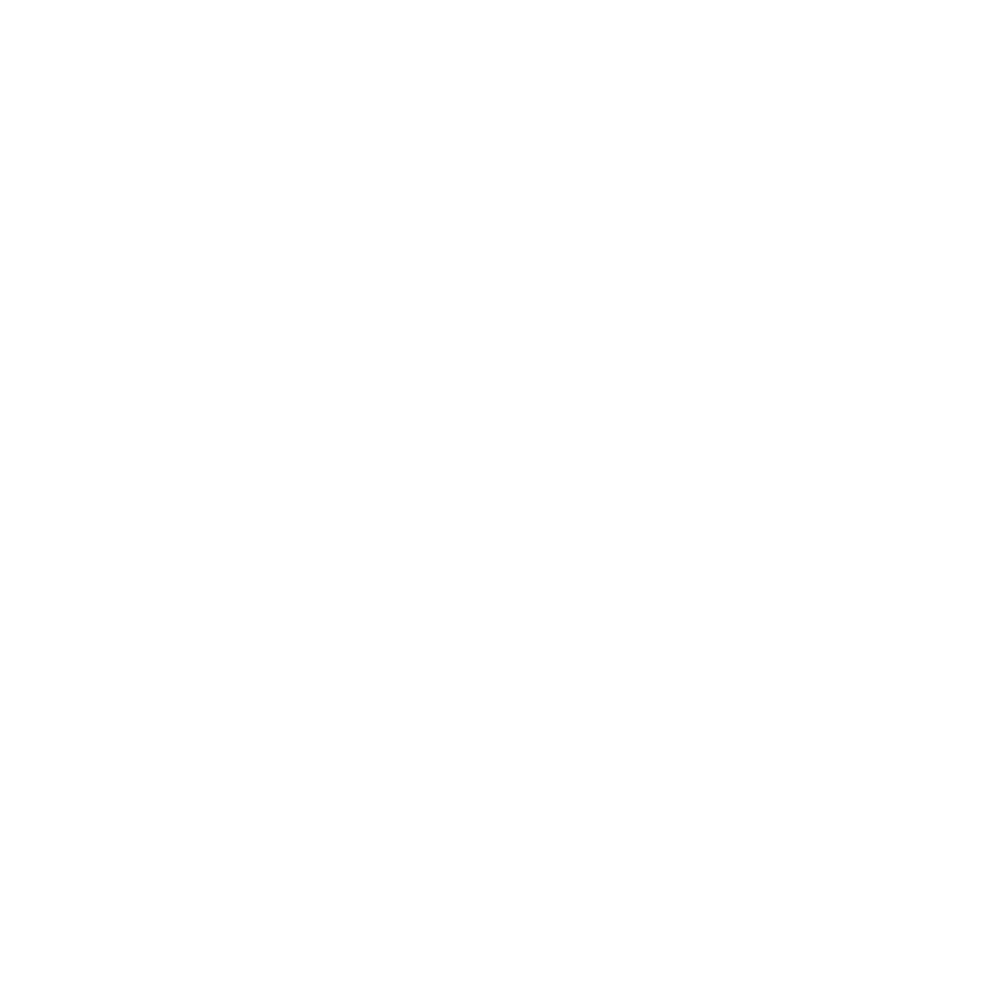

/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveS

In [6]:
dataset_train_only = get_dataset("/home/workspace/data/train/*.tfrecord")
display_for_multiple(dataset_train_only.shuffle(100).take(16), dim=4)

<IPython.core.display.Javascript object>


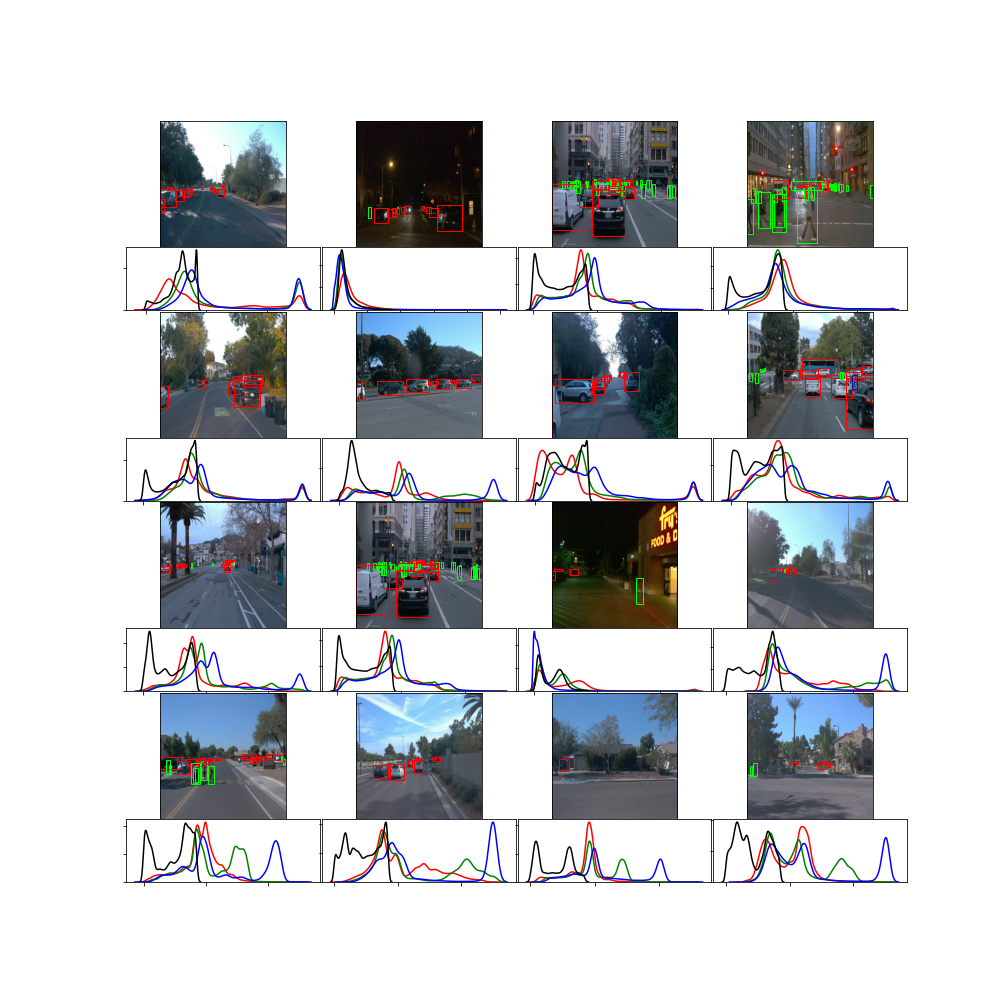

/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveS

In [7]:
display_for_multiple(dataset_train_only.shuffle(100).take(16), dim=4)

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 10


<IPython.core.display.Javascript object>


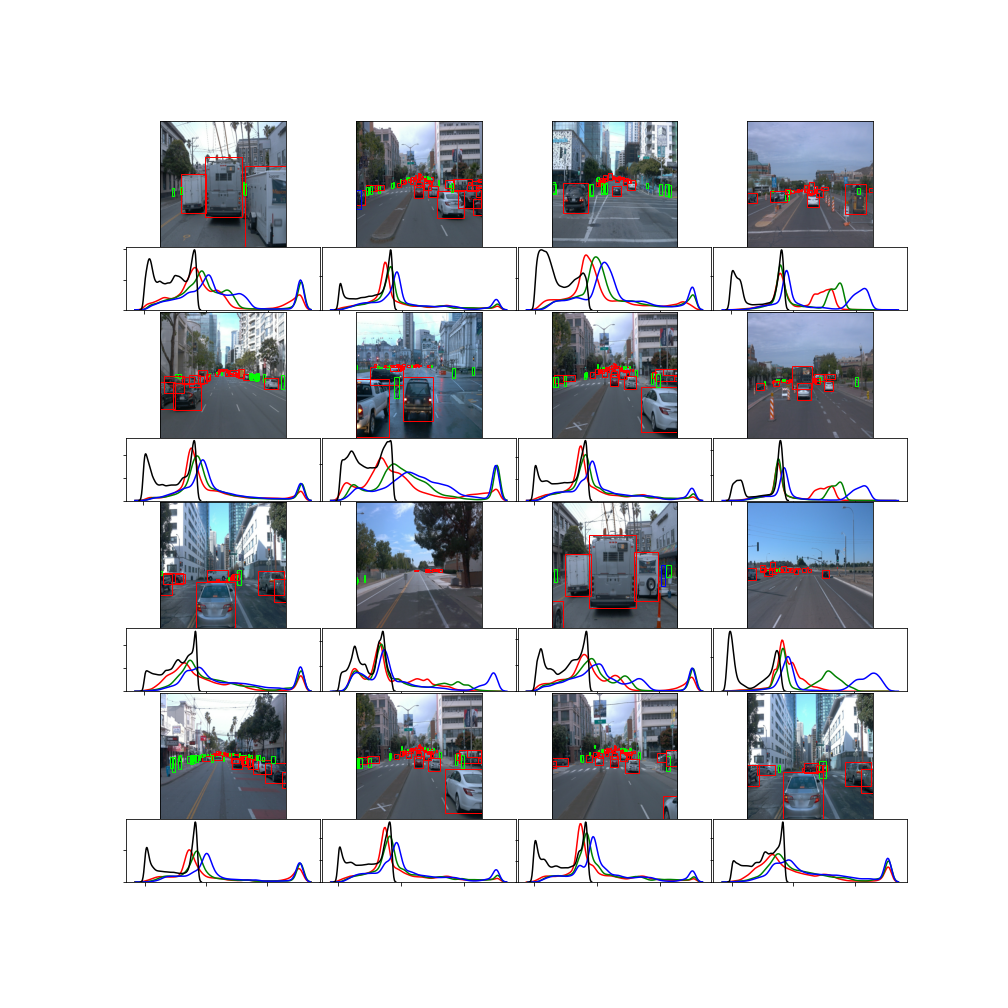

/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveS

In [8]:
dataset_val_only = get_dataset("/home/workspace/data/val/*.tfrecord")
display_for_multiple(dataset_val_only.shuffle(100).take(16), dim=4)

<IPython.core.display.Javascript object>


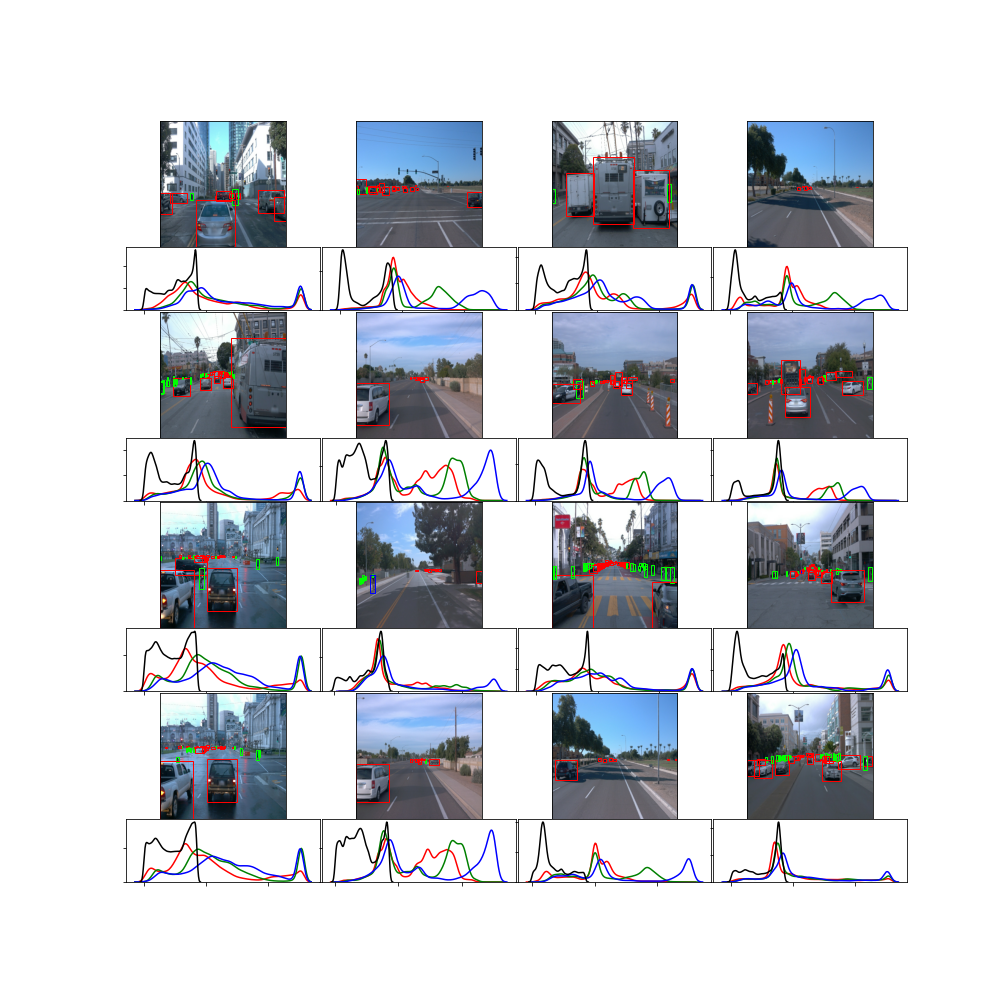

/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveS

In [9]:
display_for_multiple(dataset_val_only.shuffle(100).take(16), dim=4)

# Investigate dataset and its label distibution

In [10]:
# Some additional support and setup
import pandas as pd
import seaborn as sns
sns.set(rc={"figure.figsize":(10, 10)})

In [11]:
# To be able to assign an image to its category
train_files = [f.split('/')[-1].split('.')[0] for f in glob.glob("/home/workspace/data/train/*.tfrecord")]
val_files = [f.split('/')[-1].split('.')[0] for f in glob.glob("/home/workspace/data/val/*.tfrecord")]
test_files = [f.split('/')[-1].split('.')[0] for f in glob.glob("/home/workspace/data/test/*.tfrecord")]

In [12]:
# Create a statistics dataframe of all images
from collections import Counter

statistics = [] 
for b in dataset.take(2505): # total unique source_ids in that set
    gt_classes = Counter(b['groundtruth_classes'].numpy())
    cat = '?'
    if any(b['filename'].numpy().decode('ascii').startswith(name) for name in train_files):
        cat = 'TRAIN'
    elif any(b['filename'].numpy().decode('ascii').startswith(name) for name in val_files):
        cat = 'VAL'
    elif any(b['filename'].numpy().decode('ascii').startswith(name) for name in test_files):
        cat = 'TEST'
    statistics.append((cat, 'vehicles', gt_classes[1]))
    statistics.append((cat, 'pedestrians', gt_classes[2]))
    statistics.append((cat, 'cyclists', gt_classes[4]))
    
stats = pd.DataFrame(statistics, columns=['category', 'label', 'count'])
stats

category        label  count
0       TRAIN     vehicles      2
1       TRAIN  pedestrians      3
2       TRAIN     cyclists      0
3       TRAIN     vehicles     19
4       TRAIN  pedestrians      0
...       ...          ...    ...
7510    TRAIN  pedestrians      4
7511    TRAIN     cyclists      0
7512    TRAIN     vehicles      8
7513    TRAIN  pedestrians      2
7514    TRAIN     cyclists      0

[7515 rows x 3 columns]

# Distribution of split

In [13]:
category_stats = stats.groupby('category').size()
category_stats

category
TEST     1278
TRAIN    5553
VAL       684
dtype: int64

<IPython.core.display.Javascript object>


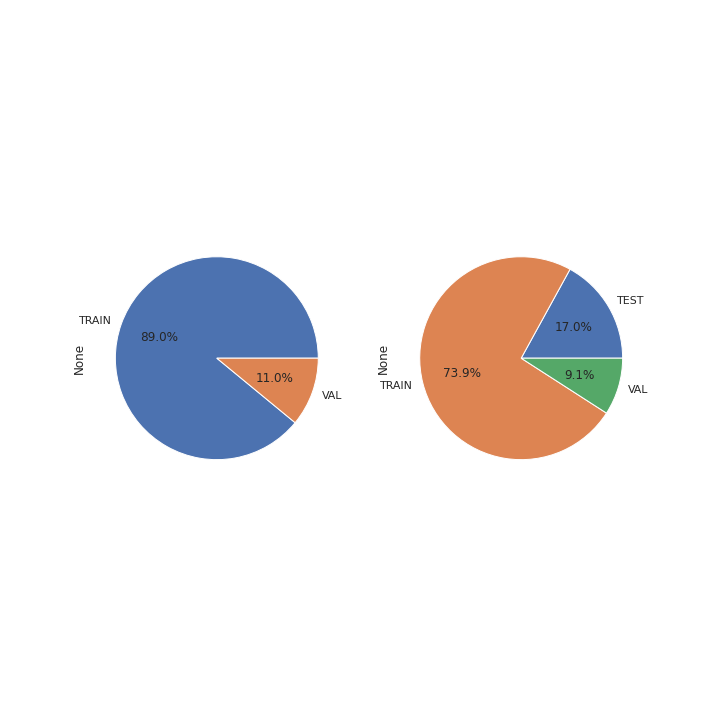

/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/data/virtual_envs/sdc-c1-gpu-augment/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:ylabel='None'>

In [22]:
fig, axs = plt.subplots(ncols=2)
category_stats[category_stats.index != 'TEST'].plot.pie(autopct='%1.1f%%', ax=axs[0])
category_stats.plot.pie(autopct='%1.1f%%', ax=axs[1])


# Distribution of labels per category

<IPython.core.display.Javascript object>


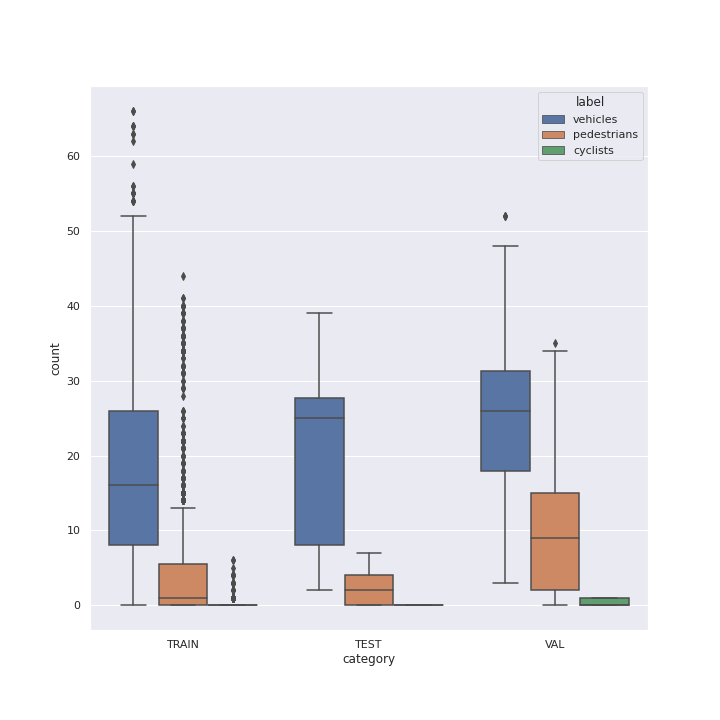

<AxesSubplot:xlabel='category', ylabel='count'>

In [21]:
fig, axs = plt.subplots(ncols=1)
sns.boxplot(x='category', y='count', hue='label', data=stats, ax=axs)